## Загрузка данных

Данные - https://www.kaggle.com/usdot/flight-delays
Описание - Сводная информация о количестве своевременных, задержанных, отмененных и измененных рейсов в США за 2015 год (5.8 млн записей)


Задачи:
* Найти аэропорт с минимальной задержкой вылета 
* Самая пунктуальная авиакомпания на прилет в Los Angeles International Airport
* Найти аэропорт, где самолёты проводят больше всего времени на рулении (среднее значение)
* Построить модель которая будет выбирать топ 3 аэропорта прилета (вероятность опоздания минимальная – RMSE метрика),  в зависимости от аэропорта вылета  


In [1]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import LinearRegression

import folium
#pip install folium

Wall time: 8.61 s


In [2]:
flights=pd.read_csv('flights.csv')
airports = pd.read_csv('airports.csv')
airlines=pd.read_csv('airlines.csv')

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
display(flights.head())
display(flights.sample(5))
display(flights.tail())

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
5569056,2015,12,15,2,EV,5058,N900EV,DTW,EVV,2015,...,2029.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
518161,2015,2,4,3,B6,1035,N306JB,STT,SJU,905,...,944.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4322512,2015,9,27,7,DL,1338,N910AT,MCO,LGA,700,...,915.0,-23.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
403666,2015,1,27,2,OO,5426,N582SW,RDD,SFO,1409,...,1514.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1785817,2015,4,24,5,AS,633,N462AS,PHX,SEA,1500,...,1805.0,6.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819078,2015,12,31,4,B6,839,N534JB,JFK,BQN,2359,...,442.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
flights.shape

(5819079, 31)

In [5]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

**Проведем анализ каждого столбца датасета в отдельности**

In [6]:
# создадим функцию для проверки уникальных значений по каждому столбцу и наличию пропусков
def unique(flights, column):
    display(flights[column].unique())
    print('Всего уникальных значений:', len(flights[column].unique()))
    print('Всего пропусков:', flights[column].isna().sum())

In [7]:
list_columns=flights.keys()

In [8]:
list_columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [9]:
for i in list_columns:
    print(i)
    print('-----------------------------------------------------------------')
    unique(flights, i)   
    print('-----------------------------------------------------------------')

YEAR
-----------------------------------------------------------------


array([2015], dtype=int64)

Всего уникальных значений: 1
Всего пропусков: 0
-----------------------------------------------------------------
MONTH
-----------------------------------------------------------------


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

Всего уникальных значений: 12
Всего пропусков: 0
-----------------------------------------------------------------
DAY
-----------------------------------------------------------------


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

Всего уникальных значений: 31
Всего пропусков: 0
-----------------------------------------------------------------
DAY_OF_WEEK
-----------------------------------------------------------------


array([4, 5, 6, 7, 1, 2, 3], dtype=int64)

Всего уникальных значений: 7
Всего пропусков: 0
-----------------------------------------------------------------
AIRLINE
-----------------------------------------------------------------


array(['AS', 'AA', 'US', 'DL', 'NK', 'UA', 'HA', 'B6', 'OO', 'EV', 'MQ',
       'F9', 'WN', 'VX'], dtype=object)

Всего уникальных значений: 14
Всего пропусков: 0
-----------------------------------------------------------------
FLIGHT_NUMBER
-----------------------------------------------------------------


array([  98, 2336,  840, ..., 6777, 6895, 6887], dtype=int64)

Всего уникальных значений: 6952
Всего пропусков: 0
-----------------------------------------------------------------
TAIL_NUMBER
-----------------------------------------------------------------


array(['N407AS', 'N3KUAA', 'N171US', ..., 'N7LEAA', 'N850DN', 'N8676A'],
      dtype=object)

Всего уникальных значений: 4898
Всего пропусков: 14721
-----------------------------------------------------------------
ORIGIN_AIRPORT
-----------------------------------------------------------------


array(['ANC', 'LAX', 'SFO', 'SEA', 'LAS', 'DEN', 'SLC', 'PDX', 'FAI',
       'MSP', 'PHX', 'SJU', 'PBG', 'IAG', 'PSE', 'BQN', 'ORD', 'GEG',
       'HNL', 'ONT', 'MCO', 'BOS', 'HIB', 'ABR', 'MAF', 'DFW', 'MKE',
       'IAH', 'BNA', 'BRO', 'VPS', 'BOI', 'BJI', 'SGF', 'PHL', 'SBN',
       'RDD', 'EUG', 'IAD', 'BUF', 'PWM', 'JFK', 'CRP', 'PIA', 'FAT',
       'SMF', 'AUS', 'MCI', 'ATL', 'JAX', 'MFR', 'IDA', 'MSN', 'DCA',
       'SAT', 'CHS', 'SBA', 'SMX', 'IND', 'CLE', 'GSP', 'BDL', 'ABI',
       'RIC', 'BFL', 'OMA', 'RDM', 'FLL', 'CID', 'TPA', 'SYR', 'ROC',
       'TYR', 'LAN', 'XNA', 'GSO', 'EWR', 'PBI', 'RSW', 'OAK', 'PVD',
       'RNO', 'PIT', 'ABQ', 'MIA', 'BWI', 'LGA', 'TUL', 'LIT', 'MSY',
       'OKC', 'ATW', 'PNS', 'MEM', 'TYS', 'MHT', 'SAV', 'CLT', 'GRB',
       'ABE', 'JAN', 'OAJ', 'FAR', 'ERI', 'LEX', 'CWA', 'MSO', 'TTN',
       'AMA', 'CLL', 'HOU', 'JLN', 'MLI', 'RDU', 'CVG', 'MHK', 'MOB',
       'TLH', 'BHM', 'CAE', 'TXK', 'ACY', 'DTW', 'RAP', 'TUS', 'EAU',
       'DLH', 'FSD',

Всего уникальных значений: 930
Всего пропусков: 0
-----------------------------------------------------------------
DESTINATION_AIRPORT
-----------------------------------------------------------------


array(['SEA', 'PBI', 'CLT', 'MIA', 'ANC', 'MSP', 'DFW', 'ATL', 'IAH',
       'PDX', 'MCI', 'FLL', 'ORD', 'HNL', 'PHX', 'EWR', 'JFK', 'MCO',
       'BOS', 'BDL', 'ITO', 'SFO', 'KOA', 'OGG', 'MYR', 'DTW', 'LIH',
       'DEN', 'SJU', 'LAX', 'BWI', 'IAD', 'BQN', 'BUF', 'LGA', 'HOU',
       'SLC', 'PHL', 'SJC', 'OAK', 'LGB', 'TPA', 'DCA', 'TTN', 'BTR',
       'LAS', 'RSW', 'BRD', 'STL', 'RKS', 'MBS', 'SNA', 'MEI', 'MDW',
       'SAN', 'RIC', 'AUS', 'OTZ', 'PIT', 'JAX', 'MSY', 'ONT', 'PSP',
       'BUR', 'DAL', 'CVG', 'SMF', 'RDU', 'JMS', 'BNA', 'DSM', 'MAF',
       'BOI', 'ELP', 'TUS', 'SCC', 'HPN', 'STT', 'MDT', 'RHI', 'SBP',
       'MKE', 'JNU', 'CMH', 'CLD', 'KTN', 'CAK', 'CRP', 'CLE', 'GPT',
       'SHV', 'TYS', 'IND', 'LIT', 'SAT', 'SRQ', 'TUL', 'GRK', 'PNS',
       'BTV', 'CHS', 'DAY', 'OKC', 'SAV', 'XNA', 'COS', 'GJT', 'BZN',
       'PUB', 'HRL', 'HDN', 'MEM', 'GEG', 'ORH', 'SYR', 'GSO', 'VPS',
       'LAW', 'ACY', 'LBB', 'JAC', 'BIL', 'EUG', 'ASE', 'TVC', 'MTJ',
       'CAE', 'PVD',

Всего уникальных значений: 930
Всего пропусков: 0
-----------------------------------------------------------------
SCHEDULED_DEPARTURE
-----------------------------------------------------------------


array([  5,  10,  20, ..., 421, 337, 409], dtype=int64)

Всего уникальных значений: 1321
Всего пропусков: 0
-----------------------------------------------------------------
DEPARTURE_TIME
-----------------------------------------------------------------


array([2.354e+03, 2.000e+00, 1.800e+01, ..., 3.460e+02, 4.030e+02,
       3.540e+02])

Всего уникальных значений: 1441
Всего пропусков: 86153
-----------------------------------------------------------------
DEPARTURE_DELAY
-----------------------------------------------------------------


array([ -11.,   -8.,   -2., ...,  888., 1194., 1649.])

Всего уникальных значений: 1218
Всего пропусков: 86153
-----------------------------------------------------------------
TAXI_OUT
-----------------------------------------------------------------


array([ 21.,  12.,  16.,  15.,  11.,  18.,  13.,  17.,  28.,  25.,   9.,
        30.,  14.,  10.,  nan,  43.,  24.,  19.,  22.,  23.,  37.,  31.,
         7.,  32.,  26.,  33.,  42.,  27.,  20.,  38.,   4.,  29.,   8.,
        41.,  56.,  48.,  40.,  34.,   3.,  36.,  61.,  35.,   6.,  45.,
        39.,  46.,  62.,  49.,   5.,  57.,  64.,  63.,  47.,  54.,  55.,
        44.,  59.,  50.,  76., 113.,  73.,  58.,  52.,   2.,  72.,  51.,
       110.,  53.,  75.,  84.,  77.,  82.,  70., 105.,  69.,  71.,  81.,
        66.,  80.,  99.,  60.,  74.,  95.,  89., 136., 131.,  79.,  68.,
       120.,  67.,  88.,   1.,  65., 176., 160., 104., 111., 112.,  83.,
        85., 121., 100.,  91.,  97.,  93.,  87., 129.,  92.,  90.,  98.,
       107., 124., 146.,  86.,  78., 115., 103.,  94., 101., 102., 126.,
       116., 132., 118., 106., 130., 109., 114., 128.,  96., 141., 125.,
       149., 147., 122., 117., 108., 119., 137., 133., 135., 169., 152.,
       139., 143., 155., 153., 127., 150., 134., 14

Всего уникальных значений: 185
Всего пропусков: 89047
-----------------------------------------------------------------
WHEELS_OFF
-----------------------------------------------------------------


array([ 15.,  14.,  34., ..., 356., 346., 407.])

Всего уникальных значений: 1441
Всего пропусков: 89047
-----------------------------------------------------------------
SCHEDULED_TIME
-----------------------------------------------------------------


array([205., 280., 286., 285., 235., 217., 181., 273., 195., 221., 173.,
       268., 214., 215., 189., 204., 210., 218., 193., 162., 338., 147.,
       183., 213., 207., 245., 227., 239., 170., 370., 323., 255., 208.,
       123., 120., 184., 246., 224., 200., 185., 240., 174., 186., 241.,
       228.,  70.,  49.,  89.,  42.,  36., 175.,  63., 140.,  68.,  69.,
        87., 165., 161., 178., 150., 141., 103.,  74.,  66., 112.,  60.,
        37.,  65.,  95., 230., 142., 157., 125.,  55., 160., 188.,  90.,
       163., 146., 167.,  88.,  85., 225.,  61.,  75., 212., 101., 136.,
       223., 122., 143., 105., 137., 104., 145., 139., 251., 209.,  77.,
       124., 116., 129., 190., 154.,  96., 314., 194., 119., 180.,  59.,
       149., 135., 249., 166., 131., 341., 156., 275.,  83.,  50.,  94.,
        80., 192., 148.,  97., 110., 115., 130., 270., 100., 257., 244.,
       404., 311., 250., 281., 114., 164., 155., 109., 234.,  73., 102.,
       151., 171., 168., 203., 232., 128.,  84., 11

Всего уникальных значений: 551
Всего пропусков: 6
-----------------------------------------------------------------
ELAPSED_TIME
-----------------------------------------------------------------


array([194., 279., 293., 281., 215., 230., 170., 249., 193., 203., 149.,
       266., 210., 199., 198., 200., 217., 201., 186., 143., 347., 147.,
       276., 163., 175., 218., 220., 224., 208., 234.,  nan, 231., 385.,
       322., 241., 248., 191., 125., 209., 178., 264., 183., 247., 196.,
       243., 258., 232.,  74.,  51.,  85.,  48.,  36., 182.,  55., 134.,
        78.,  67., 168., 155., 189., 150., 137., 106.,  72.,  57., 110.,
        35.,  70., 142., 157., 138.,  44., 146., 167., 180., 153.,  52.,
        75.,  80., 164.,  84., 114., 101., 103., 132., 188., 113., 144.,
       136., 197.,  59., 190.,  66., 202., 104., 122., 128., 133.,  99.,
       282., 109., 179.,  61., 172.,  76., 223., 177., 343., 251., 269.,
        73.,  50.,  83.,  93.,  90., 160., 120., 152.,  79., 131., 130.,
       135.,  88., 145.,  81., 270., 256., 141., 242., 165., 396., 291.,
       227., 173., 294., 174., 181., 151., 127., 102.,  68., 226., 156.,
       222., 124., 108.,  94., 166., 162., 239., 24

Всего уникальных значений: 713
Всего пропусков: 105071
-----------------------------------------------------------------
AIR_TIME
-----------------------------------------------------------------


array([169., 263., 266., 258., 199., 206., 154., 228., 173., 186., 133.,
       238., 188., 176., 166., 171., 187., 128., 311., 255., 150., 156.,
       205., 217.,  nan, 182., 148., 361., 298., 220., 170., 231., 174.,
       103., 149., 239., 183., 225., 160., 224., 163., 237., 214.,  39.,
        35.,  61.,  30., 179.,  20., 147.,  38., 112.,  41., 146., 132.,
       111.,  66.,  49.,  42.,  79.,  34.,  21., 210., 125., 138.,  96.,
        22., 143., 127., 142., 194.,  56.,  50., 184.,  33.,  54., 129.,
        95., 178.,  84., 105., 109., 158.,  72.,  36., 107., 152.,  44.,
       180.,  86.,  91., 120., 104., 134.,  27.,  78., 234., 118.,  46.,
       159.,  28., 110.,  58., 195., 198., 130., 162., 310., 131., 216.,
       243.,  43.,  48.,  25.,  65.,  92., 123., 100., 135.,  57.,  90.,
        88., 114., 175.,  63., 230.,  76., 253., 222., 126.,  52., 376.,
       268., 201., 155., 273.,  87., 137., 124., 106.,  80., 151., 139.,
       190.,  82., 202.,  99., 141.,  60., 145., 15

Всего уникальных значений: 676
Всего пропусков: 105071
-----------------------------------------------------------------
DISTANCE
-----------------------------------------------------------------


array([1448, 2330, 2296, ...,  876, 1100, 1672], dtype=int64)

Всего уникальных значений: 1363
Всего пропусков: 0
-----------------------------------------------------------------
WHEELS_ON
-----------------------------------------------------------------


array([404., 737., 800., ..., 318., 324., 322.])

Всего уникальных значений: 1441
Всего пропусков: 92513
-----------------------------------------------------------------
TAXI_IN
-----------------------------------------------------------------


array([  4.,  11.,   8.,   5.,   6.,   3.,   7.,   2.,  40.,  10.,  nan,
        12.,   9.,  13.,  19.,  14.,  15.,  30.,  17.,  16.,  23.,  52.,
        21.,  26.,  80.,  29.,  24.,  20.,  22.,  18.,  32.,  55.,  33.,
        34.,   1.,  27.,  28.,  25.,  36.,  41.,  39.,  37.,  61.,  74.,
        58.,  31.,  46.,  42.,  44.,  35.,  43.,  45.,  56.,  48.,  38.,
        53.,  59.,  50.,  49.,  67.,  47.,  70.,  51.,  84.,  62.,  54.,
        60., 103.,  63.,  66.,  82.,  57.,  91.,  72.,  64.,  69., 111.,
        65.,  78.,  68.,  79.,  95.,  88.,  89.,  71.,  90.,  77.,  76.,
        73.,  87.,  75.,  93.,  83.,  81.,  96., 105.,  92.,  86.,  97.,
       122., 146., 123., 127., 138., 124., 136., 100., 134., 109., 101.,
       112., 133., 142., 117., 115., 170., 120., 149., 179., 128., 135.,
        85., 137., 108., 174., 141., 158., 145., 167., 106., 113., 107.,
        99., 154., 126., 125.,  98., 104., 114., 144., 102., 162., 151.,
       140., 119., 148., 143.,  94., 152., 130., 13

Всего уникальных значений: 186
Всего пропусков: 92513
-----------------------------------------------------------------
SCHEDULED_ARRIVAL
-----------------------------------------------------------------


array([430, 750, 806, ..., 324, 332, 241], dtype=int64)

Всего уникальных значений: 1435
Всего пропусков: 0
-----------------------------------------------------------------
ARRIVAL_TIME
-----------------------------------------------------------------


array([408., 741., 811., ..., 328., 317., 357.])

Всего уникальных значений: 1441
Всего пропусков: 92513
-----------------------------------------------------------------
ARRIVAL_DELAY
-----------------------------------------------------------------


array([ -22.,   -9.,    5., ..., 1115., 1372., 1076.])

Всего уникальных значений: 1241
Всего пропусков: 105071
-----------------------------------------------------------------
DIVERTED
-----------------------------------------------------------------


array([0, 1], dtype=int64)

Всего уникальных значений: 2
Всего пропусков: 0
-----------------------------------------------------------------
CANCELLED
-----------------------------------------------------------------


array([0, 1], dtype=int64)

Всего уникальных значений: 2
Всего пропусков: 0
-----------------------------------------------------------------
CANCELLATION_REASON
-----------------------------------------------------------------


array([nan, 'A', 'B', 'C', 'D'], dtype=object)

Всего уникальных значений: 5
Всего пропусков: 5729195
-----------------------------------------------------------------
AIR_SYSTEM_DELAY
-----------------------------------------------------------------


array([      nan, 2.500e+01, 4.300e+01, 0.000e+00, 2.000e+01, 1.700e+01,
       1.300e+01, 7.000e+00, 2.200e+01, 1.400e+01, 4.000e+00, 6.000e+00,
       1.600e+01, 2.700e+01, 1.200e+01, 2.000e+00, 1.500e+01, 1.800e+01,
       3.200e+01, 8.500e+01, 3.000e+00, 5.000e+00, 8.600e+01, 5.800e+01,
       3.500e+01, 3.400e+01, 3.300e+01, 1.100e+01, 9.000e+00, 2.600e+01,
       2.800e+01, 4.000e+01, 2.300e+01, 1.900e+01, 2.400e+01, 9.700e+01,
       2.900e+01, 2.100e+01, 1.000e+00, 1.000e+01, 8.000e+00, 3.000e+01,
       6.700e+01, 4.800e+01, 6.500e+01, 3.100e+01, 4.100e+01, 4.200e+01,
       3.900e+01, 3.600e+01, 5.100e+01, 8.100e+01, 4.600e+01, 1.640e+02,
       5.200e+01, 8.800e+01, 4.900e+01, 4.500e+01, 3.700e+01, 5.000e+01,
       5.400e+01, 5.900e+01, 1.380e+02, 5.300e+01, 7.200e+01, 6.800e+01,
       7.700e+01, 6.100e+01, 6.000e+01, 4.400e+01, 3.800e+01, 7.600e+01,
       4.700e+01, 7.300e+01, 5.700e+01, 7.400e+01, 8.700e+01, 5.600e+01,
       6.300e+01, 1.350e+02, 1.200e+02, 1.160e+02, 

Всего уникальных значений: 571
Всего пропусков: 4755640
-----------------------------------------------------------------
SECURITY_DELAY
-----------------------------------------------------------------


array([ nan,   0.,  46., 107.,  11.,  10.,  30.,  19.,   6.,   1.,   2.,
         9.,  17.,  34.,  35.,  15.,  28.,  12.,  27.,  16.,  99.,  56.,
        20.,  58.,   7.,  61.,  13.,   3.,  14.,  23.,  21.,   4.,  54.,
        52.,  53.,  64.,  24.,  18.,  50.,  96.,  62.,  26.,  32.,  22.,
         5.,  29.,  39.,  63.,  45.,  25.,  80.,  91.,  59.,  73.,  31.,
         8.,  40., 104.,  36.,  41., 237., 227.,  68.,  71.,  47.,  43.,
        55.,  75.,  37.,  98.,  57., 241.,  92.,  78.,  42.,  38.,  97.,
       168., 141., 142.,  33.,  90.,  51., 140.,  69., 121., 190.,  88.,
       123.,  79., 204.,  77., 158., 160., 215., 221.,  49.,  44.,  94.,
        84.,  65.,  86., 102.,  76.,  81., 205., 101.,  95.,  85., 116.,
        48., 175.,  67., 126.,  66.,  72., 138.,  74., 103., 118., 154.,
       191.,  60., 148., 214., 196., 135., 256., 110., 124., 203., 120.,
       164., 186.,  93.,  83.,  70., 181., 122.,  82., 108., 573., 128.,
        89., 106., 440., 127., 171., 129., 133., 14

Всего уникальных значений: 155
Всего пропусков: 4755640
-----------------------------------------------------------------
AIRLINE_DELAY
-----------------------------------------------------------------


array([  nan,    0.,   15., ...,  879., 1185., 1636.])

Всего уникальных значений: 1068
Всего пропусков: 4755640
-----------------------------------------------------------------
LATE_AIRCRAFT_DELAY
-----------------------------------------------------------------


array([      nan, 0.000e+00, 8.800e+01, 3.100e+01, 3.060e+02, 3.000e+00,
       8.000e+00, 7.000e+00, 5.000e+00, 1.200e+01, 2.000e+01, 1.100e+01,
       1.900e+01, 2.900e+01, 4.800e+01, 2.500e+01, 1.300e+01, 7.500e+01,
       2.350e+02, 1.000e+01, 6.000e+00, 6.200e+01, 8.000e+01, 1.600e+01,
       1.010e+02, 3.700e+01, 7.400e+01, 1.400e+01, 7.700e+01, 6.300e+01,
       4.000e+01, 1.840e+02, 5.600e+01, 1.400e+02, 3.900e+01, 2.600e+01,
       6.500e+01, 4.670e+02, 8.900e+01, 1.000e+02, 3.300e+01, 4.000e+00,
       1.270e+02, 1.160e+02, 2.000e+00, 9.000e+00, 7.800e+01, 2.100e+01,
       7.600e+01, 1.800e+01, 7.300e+01, 5.900e+01, 1.000e+00, 1.210e+02,
       1.220e+02, 4.200e+01, 2.200e+01, 2.300e+01, 2.800e+01, 1.740e+02,
       2.400e+01, 1.280e+02, 1.020e+02, 6.700e+01, 6.100e+01, 2.640e+02,
       1.500e+01, 3.500e+01, 3.400e+01, 4.300e+01, 1.660e+02, 4.100e+01,
       2.700e+01, 5.700e+01, 1.700e+01, 7.100e+01, 3.800e+01, 3.600e+01,
       5.200e+01, 3.000e+01, 1.250e+02, 5.100e+01, 

Всего уникальных значений: 696
Всего пропусков: 4755640
-----------------------------------------------------------------
WEATHER_DELAY
-----------------------------------------------------------------


array([      nan, 0.000e+00, 1.020e+02, 1.280e+02, 2.130e+02, 1.160e+02,
       1.110e+02, 1.070e+02, 5.400e+01, 1.700e+01, 1.310e+02, 9.300e+01,
       1.600e+01, 1.560e+02, 4.000e+00, 5.000e+01, 2.800e+01, 4.800e+01,
       5.500e+01, 1.200e+02, 2.400e+01, 2.500e+01, 4.100e+01, 7.100e+01,
       1.900e+01, 1.800e+01, 7.800e+01, 8.400e+01, 1.500e+01, 8.000e+00,
       9.000e+00, 1.000e+00, 6.100e+01, 1.270e+02, 1.400e+01, 4.200e+01,
       1.370e+02, 2.300e+01, 3.600e+01, 3.000e+00, 5.000e+00, 2.700e+01,
       1.250e+02, 6.000e+00, 1.200e+01, 2.200e+01, 6.200e+01, 3.100e+01,
       7.000e+00, 2.000e+00, 2.000e+01, 3.500e+01, 3.300e+01, 1.100e+01,
       6.800e+01, 1.030e+02, 7.500e+01, 2.900e+01, 3.000e+01, 8.900e+01,
       8.100e+01, 4.600e+01, 5.100e+01, 1.000e+01, 2.100e+01, 8.300e+01,
       6.600e+01, 8.200e+01, 1.040e+02, 4.300e+01, 1.500e+02, 6.400e+01,
       4.500e+01, 1.290e+02, 1.340e+02, 1.790e+02, 7.200e+01, 1.050e+02,
       5.700e+01, 6.000e+01, 5.600e+01, 8.000e+01, 

Всего уникальных значений: 633
Всего пропусков: 4755640
-----------------------------------------------------------------


**Промежуточный вывод:**

---------------------------------------------------------------------------------------------------------------------------
В датасете имеются данные по месяцам, дням и дням недели могут быть полезны для анализа задержек рейсов в зависмости от этих факторов. 14 авиакомпаний анализируется и 930 аэропортов. Я думаю, аэропортов будет втрое меньше, поскольку наименование указано в трех вариантах(цифровые данные будут удалены). 

## Предобработка данных

In [10]:
# Приведем названия столбцов к нижнему регистру
flights.columns = [i.lower() for i in flights]
display(flights.head())

,year,month,day,day_of_week,airline,flight_number,tail_number,origin_airport,destination_airport,scheduled_departure,...,arrival_time,arrival_delay,diverted,cancelled,cancellation_reason,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Проверим наличие дубликатов
flights.duplicated().sum()

0

In [12]:
flights.isna().sum()


year                         0
month                        0
day                          0
day_of_week                  0
airline                      0
flight_number                0
tail_number              14721
origin_airport               0
destination_airport          0
scheduled_departure          0
departure_time           86153
departure_delay          86153
taxi_out                 89047
wheels_off               89047
scheduled_time               6
elapsed_time            105071
air_time                105071
distance                     0
wheels_on                92513
taxi_in                  92513
scheduled_arrival            0
arrival_time             92513
arrival_delay           105071
diverted                     0
cancelled                    0
cancellation_reason    5729195
air_system_delay       4755640
security_delay         4755640
airline_delay          4755640
late_aircraft_delay    4755640
weather_delay          4755640
dtype: int64

In [13]:
# Создадим список аэропортов, название которых обозначено цифрами
list=['14747','14771',
       '12889', '12892', '14869', '10299', '11292', '14107', '11630',
       '10732', '14254', '10141', '10627', '11982', '12173', '13930',
       '14683', '12266', '11618', '10721', '13487', '11884', '15919',
       '13851', '11111', '10693', '12191', '14783', '15016', '14487',
       '10423', '15370', '11953', '13891', '15376', '11778', '11278',
       '14100', '13204', '15304', '11637', '14842', '10155', '11775',
       '11298', '11057', '13931', '10821', '14122', '11049', '10990',
       '10631', '13158', '14108', '13198', '11447', '12206', '13495',
       '14057', '15624', '10747', '15411', '12891', '10994', '13256',
       '10792', '14492', '12451', '13127', '10781', '14960', '12278',
       '14685', '11995', '13485', '11977', '10257', '13796', '13232',
       '13296', '14570', '14893', '14524', '12217', '10713', '10208',
       '10136', '11603', '14689', '11471', '11315', '13264', '12478',
       '14814', '11308', '11066', '12896', '10397', '14307', '11721',
       '11140', '10185', '13277', '11203', '13342', '11433', '11697',
       '12953', '10599', '12156', '14952', '10620', '11042', '15096',
       '10408', '15249', '11423', '12915', '12264', '12339', '10140',
       '13871', '14027', '13244', '11267', '11540', '14576', '10868',
       '13486', '13476', '14489', '12945', '15607', '10529', '11986',
       '14635', '13303', '10785', '15380', '11996', '10561', '10874',
       '13367', '10146', '10431', '11973', '10980', '12197', '14098',
       '12323', '10577', '11150', '10135', '11617', '13795', '13029',
       '11003', '11146', '11577', '15356', '11259', '10279', '14321',
       '14843', '11638', '14828', '11481', '12951', '10434', '12448',
       '14730', '15323', '14252', '11193', '10849', '14193', '14986',
       '11641', '12992', '13422', '11612', '11823', '11980', '13290',
       '10158', '10685', '13377', '11109', '11076', '11122', '11865',
       '14543', '14905', '11587', '14457', '12335', '12343', '12003',
       '10157', '12884', '14633', '15048', '10268', '15295', '12389',
       '11525', '14262', '12888', '12391', '11648', '14696', '12758',
       '13830', '10469', '15412', '10731', '14679', '14831', '11413',
       '13433', '12982', '11867', '14698', '11537', '15389', '12402',
       '11337', '13360', '13076', '14006', '10728', '15401', '13230',
       '12016', '11067', '11274', '11921', '12519', '11013', '10779',
       '14150', '14794', '12511', '12177', '12523', '14908', '12007',
       '14588', '13577', '13061', '15041', '14109', '10800', '12954',
       '12441', '12898', '11695', '16218', '14113', '11624', '11503',
       '10739', '14574', '14711', '12129', '15070', '14520', '13184',
       '11252', '12280', '13241', '11898', '15024', '14674', '10551',
       '12819', '13459', '10581', '13970', '10372', '10918', '14709',
       '12255', 11267, 12266, 10821, 14771, 11433, 11982, 11905, 15411,
       14679, 14108, 10397, 13871, 11618, 14574, 10423, 11259, 10800,
       11140, 12191, 12889, 13198, 10529, 10693, 13232, 11540, 14570,
       14635, 14831, 11298, 13204, 11278, 14100, 12892, 12478, 13930,
       15304, 14107, 12523, 12954, 11697, 14057, 12339, 13487, 14893,
       11986, 11292, 14576, 15370, 12402, 14908, 12953, 12758, 15016,
       10721, 12264, 10685, 11612, 13277, 11057, 12891, 12197, 11193,
       13495, 13891, 13244, 14843, 14747, 11996, 10333, 14262, 11695,
       13342, 14698, 10431, 15376, 12451, 14524, 13830, 13796, 14122,
       14960, 16218, 10713, 11066, 10208, 14683, 14869, 14492, 11638,
       11413, 10792, 10408, 14689, 10980, 14952, 12951, 15323, 11884,
       14307, 14730, 14783, 11603, 11977, 11921, 13577, 13061, 13851,
       11042, 12448, 12992, 10874, 12896, 11308, 12173, 12206, 13377,
       10747, 13256, 13303, 10185, 10599, 10140, 15295, 11898, 13795,
       10728, 10994, 12391, 10299, 12217, 13290, 12007, 11109, 15096,
       10627, 13433, 15249, 12278, 12915, 11637, 13931, 13485, 11721,
       11775, 13476, 15841, 14027, 15380, 12945, 11315, 15919, 13360,
       10868, 14986, 12982, 10279, 11150, 13264, 14193, 11823, 13367,
       10469, 11423, 11337, 11252, 13029, 14696, 11049, 13296, 14685,
       13158, 12323, 10257, 14588, 11274, 13344, 13933, 15412, 13422,
       11146, 15991, 13230, 14794, 11003, 14828, 10781, 10990, 10785,
       10434, 14457, 11481, 11537, 10136, 14814, 10754, 10135, 10731,
       13127, 14321, 10849, 14098, 10146, 15607, 11624, 12177, 10158,
       12884, 15624, 14256, 11973, 14842, 15356, 10561, 14113, 15389,
       14489, 12094, 12888, 13076, 12129, 13873, 10157, 11995, 10631,
       12441, 12343, 14252, 11097, 10732, 10154, 11122, 11641, 13486,
       12003, 10620, 10779, 12335, 11076, 15041, 12156, 12280, 10926,
       12819, 11865, 12519, 11778, 10551, 12389, 11953, 12898, 15024,
       10155, 11013, 10372, 11587, 13964, 11980, 11630, 11648, 14905,
       11525, 15070, 11471, 11111, 14633, 11447, 11203, 13241, 12511,
       11067, 10268, 13184, 10141, 13541, 14150, 15027, 14109, 15048,
       14006, 10739, 14520, 11617, 14487, 11867, 14674, 14543, 10577,
       10170, 11577, 14709, 14711, 12255, 10165, 10918, 15401, 13970,
       15497, 12265, 14254, 10581, 12016, 11503, 13459, 14222, 14025,
       13502, '15841', '13344', '15991', '10754', '14256', '13873',
       '11097', '10926', '13964', '11905', '15027', '13933', '10170',
       '10333', '14222', '14025', '13502', '15497', '12265']

In [14]:
# Загрузим полные названия аэропортов и заменим в таблице flights
airports_names = airports.set_index('IATA_CODE')['AIRPORT'].to_dict()
flights["origin_airport"].replace(airports_names, inplace = True)  
flights["destination_airport"].replace(airports_names, inplace = True)

In [15]:
# Загрузим полные названия авиакомпаний и заменим в таблице flights
airlines_names = airlines.set_index('IATA_CODE')['AIRLINE'].to_dict()
flights["airline"].replace(airlines_names, inplace = True)

In [16]:
#Удалим название аэропортов в цифровом выражении
flights_full= flights.query('origin_airport not in list')
print('Всего уникальных названий аэропортов:', len(flights_full['origin_airport'].unique()))

Всего уникальных названий аэропортов: 322


**Промежуточный вывод**

Выполнив загрузку и предобработку данных  можно выделить следующее:
типы данных корректны;
дубликаты отсутствуют;
название срок приведено к единому формату;
некоррректные данные удалены, основная таблица дополнена данными из смежных таблиц

## Исследовательский анализ данных

In [17]:
flights.describe()

,year,month,day,day_of_week,flight_number,scheduled_departure,departure_time,departure_delay,taxi_out,wheels_off,...,scheduled_arrival,arrival_time,arrival_delay,diverted,cancelled,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,...,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,...,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,...,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


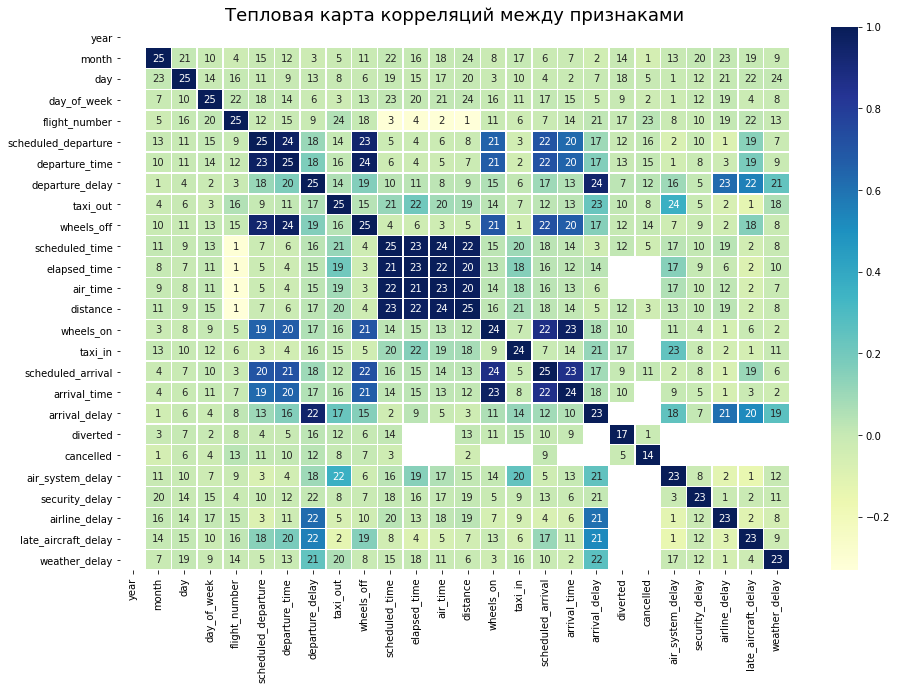

In [18]:
# построим матрицу корреляций
corr= flights.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=corr.rank(axis="columns"), linewidths=.5, cmap='YlGnBu')
plt.title('Тепловая карта корреляций между признаками', fontsize=18)
plt.show()

**Промежуточный вывод**: по графику корреляции видно, что наиболее сильная корреляция между departure_delay и arrival_delay, wheels_off,airline_delay,late_aircraft_delay,weather_delay. В тоже время cancelled коррелирует с flight_number, distance c air_time, а arrival_time с  departure_time и  wheels_off. Никакой корреляции нет между cancelled и air_time, elapsed_time. 

### Отмененные и перенаправленные рейсы

**Отмененные рейсы**

In [19]:
# Исследуем отмененные рейсы
print('Всего отмененных рейсов за 2015 год: ', flights[flights['cancelled']==1].shape[0])
print('Всего отмененных рейсов за 2015 год в %: ', round(((flights[flights['cancelled']==1].shape[0])/len(flights)*100),2), '%')

Всего отмененных рейсов за 2015 год:  89884
Всего отмененных рейсов за 2015 год в %:  1.54 %


In [20]:
flights[flights['cancelled']==1].isnull().sum()

year                       0
month                      0
day                        0
day_of_week                0
airline                    0
flight_number              0
tail_number            14721
origin_airport             0
destination_airport        0
scheduled_departure        0
departure_time         86153
departure_delay        86153
taxi_out               89047
wheels_off             89047
scheduled_time             5
elapsed_time           89884
air_time               89884
distance                   0
wheels_on              89884
taxi_in                89884
scheduled_arrival          0
arrival_time           89884
arrival_delay          89884
diverted                   0
cancelled                  0
cancellation_reason        0
air_system_delay       89884
security_delay         89884
airline_delay          89884
late_aircraft_delay    89884
weather_delay          89884
dtype: int64

Вывод: всего было отменено 89884 рейса, по каждому отменному рейсу есть запись о причинах отмены, также по этим рейсам соответственно отсутстсвует информация о времени полета и приземления.

**Перенаправленные рейсы**

In [21]:
print('Всего перенаправленных рейсов за 2015 год: ', flights[flights['diverted']==1].shape[0])
print('Всего перенаправленных рейсов за 2015 год в %: ', round(((flights[flights['diverted']==1].shape[0])/len(flights)*100),2), '%')

Всего перенаправленных рейсов за 2015 год:  15187
Всего перенаправленных рейсов за 2015 год в %:  0.26 %


**Вывод**:
 за 2015 год менее 2% рейсов было отменено/перенаправлено, по каждому случаю представлены причины, что требует более детального анализа далее.  

### Анализ дальности полетов

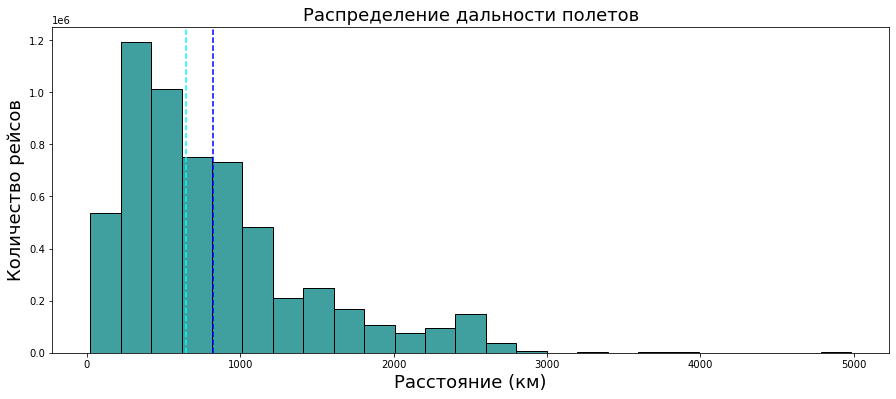

In [22]:
# Посмотрим на распределение дальности полетов
plt.figure(figsize=(15, 6))
sns.histplot(data=flights, x="distance", bins=25, color='teal')
plt.axvline(np.mean(flights.distance), color='blue', linestyle='--')
plt.axvline(np.median(flights.distance), color='aqua', linestyle='--')
plt.ylabel("Количество рейсов", fontsize=18)
plt.xlabel("Расстояние (км)", fontsize=18)
plt.title('Распределение дальности полетов', fontsize=18)
plt.show()

**Вывод**: График представляет собой распределение с отклонением вправо. Наиболее часто полёты совершаются на расстояния от 200 до 800 км. На графике голубым обозначена медиана, а синим среднее значение дальности полетов. Они не равны, так как в среднее значение учитываются все достаточно длительные полёты, медиана же делит данные пополам.

In [23]:
pivot = flights.groupby('origin_airport').agg({'distance':'median', 'arrival_delay':"median"})
pivot


,distance,arrival_delay
origin_airport,,
10135,655.0,-3.0
10136,158.0,-16.0
10140,628.0,-5.0
10141,257.0,-4.0
10146,145.0,-1.0
...,...,...
Yakutat Airport,206.0,-11.0
Yampa Valley Airport (Yampa Valley Regional),891.0,-6.0
Yeager Airport,363.0,-2.0


In [24]:
pivot['dist_group']='Дальнее расстояние'
pivot.loc[pivot['distance']<700,'dist_group' ]='Ближние расстояния'

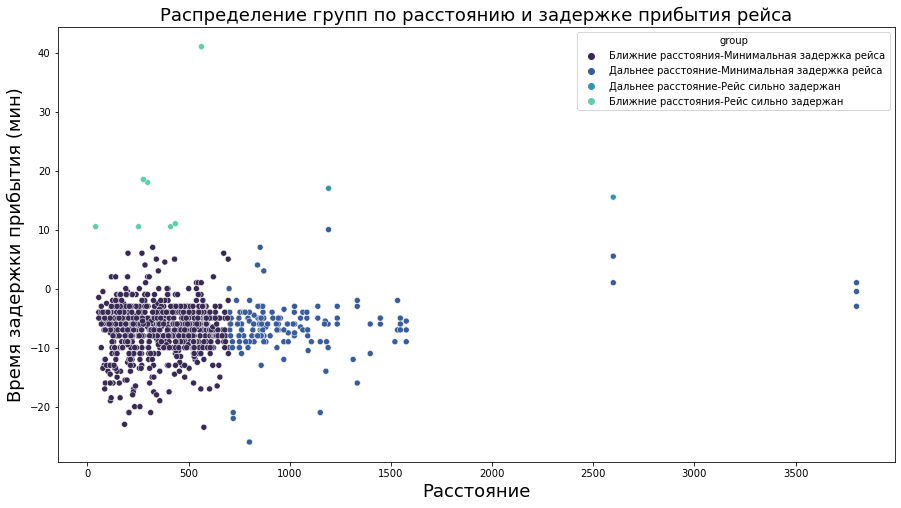

In [25]:
pivot['delay_group']='Минимальная задержка рейса'
pivot.loc[pivot['arrival_delay']>10, 'delay_group' ]='Рейс сильно задержан'
pivot['group']=pivot['dist_group'].astype(str)+'-'+pivot['delay_group'].astype(str)

plt.figure(figsize=(15, 8))
sns.scatterplot(data=pivot, x="distance", y="arrival_delay", hue="group", palette='mako')
plt.xlabel('Расстояние', fontsize=18)
plt.ylabel("Время задержки прибытия (мин)", fontsize=18)
plt.title('Распределение групп по расстоянию и задержке прибытия рейса', fontsize=18)
plt.show()

**Вывод**: при делении на группы видно, что наибольшая часть полетов относится к полетам - Близкое расстояние*Минимальная задержка. 

### Распредение причин задержек рейсов по категориям и месяцам

In [26]:
df=flights.groupby('month').sum().reset_index()
df

,month,year,day,day_of_week,flight_number,scheduled_departure,departure_time,departure_delay,taxi_out,wheels_off,...,scheduled_arrival,arrival_time,arrival_delay,diverted,cancelled,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay
0,1,946985520,7450403,1891884,1065112870,622008942,610941644.0,4472873.0,7538590.0,621517885.0,...,708112019,683447287.0,2656883.0,973,11982,1278055.0,6700.0,1708155.0,2183865.0,263087.0
1,2,864819865,6266867,1674993,970556804,568171229,546486757.0,4862650.0,6915822.0,555920432.0,...,647019746,611110155.0,3391960.0,1011,20517,1349173.0,4580.0,1712660.0,2157918.0,411265.0
2,3,1016188680,8097476,1956351,1113630468,673069198,662812819.0,4769327.0,7842328.0,673173079.0,...,756752239,731651829.0,2421650.0,1172,11002,1228893.0,6586.0,1818680.0,2156090.0,228661.0
3,4,977579265,7525419,1890276,1057979362,645540784,642065441.0,3713439.0,7550308.0,652588086.0,...,724777031,709858597.0,1515962.0,1380,4520,1118027.0,3660.0,1490594.0,1785437.0,221590.0
4,5,1001440895,7931776,2036628,1068183482,661863733,657267938.0,4648196.0,7720538.0,667346057.0,...,742592528,724246985.0,2196049.0,1658,5694,1254652.0,5711.0,1667920.0,2172521.0,336555.0
5,6,1015352455,7811012,1905539,1090778475,673028611,664257527.0,6925861.0,8059247.0,673899181.0,...,748490375,719764945.0,4732115.0,1930,9120,1630868.0,7084.0,2296333.0,3055836.0,380699.0
6,7,1049246770,8415667,2049983,1128966851,694443175,691652583.0,5882051.0,8363508.0,701835630.0,...,772496118,752412108.0,3308402.0,1528,4806,1343455.0,6821.0,2021379.0,2782381.0,232468.0
7,8,1028730040,8087668,2038832,1088508674,679550601,675895001.0,5023797.0,8132115.0,686133796.0,...,761368406,743551908.0,2321913.0,1528,5052,1274603.0,11993.0,1819598.0,2244485.0,265792.0
8,9,936866190,7245995,1769936,991424603,615854361,613876530.0,2233395.0,7326691.0,624378905.0,...,695483369,686258432.0,-357046.0,718,2075,786621.0,5968.0,1176791.0,1185164.0,137043.0
9,10,979622475,7719549,1950537,1028079636,643715612,641442896.0,2410741.0,7610479.0,652542011.0,...,726564200,717006074.0,-376833.0,833,2454,802697.0,3040.0,1206011.0,1194257.0,109225.0


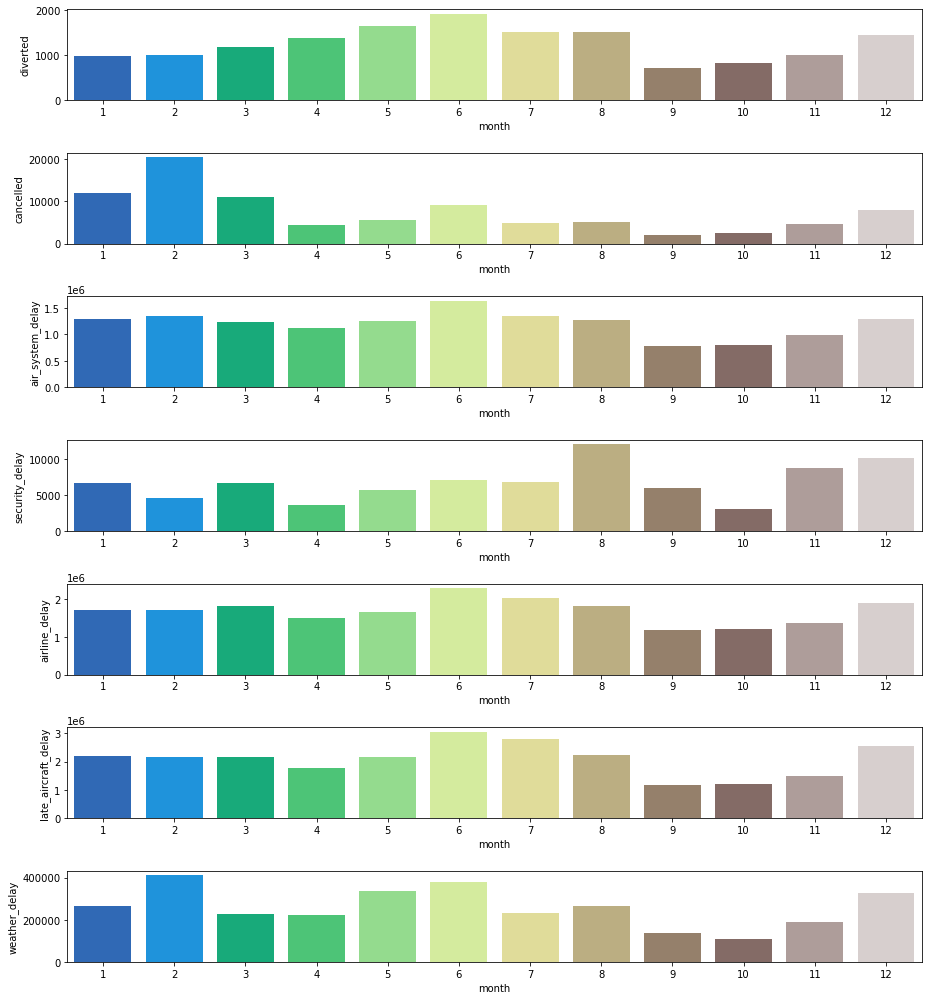

In [27]:
colums_n = ['diverted','cancelled','air_system_delay','security_delay', 'airline_delay', 'late_aircraft_delay', 'weather_delay']
location= [711, 712, 713, 714,715,716,717]

plt.figure(figsize=(13, 14))
for col,number in zip(colums_n,location):
    plt.subplot(number)
    sns.barplot(data=df, x='month',y=col,palette='terrain' )
plt.tight_layout()
plt.show();

**Вывод**: На графике можем видеть, что  максимальное количество отмененных рейсов приходится на февраль, что в основном связано с погодными условиями. В декабре и феврале наблюдается большинство задержек из-за погоды, причина тому снежные заносы, а с сентября по ноябрь - наименьшее, поскольку погодные условия в этот период наиболее благоприятны. Кроме того, высокие показатель в июне в основном связан с дождями и наводнениями в некоторых частях страны. Что касается задержек в связи с безопасностью и перенаправления рейсов, то в период с мая по август наблюдаются максимальные показатели, что в основном связано с тем, что количество рейсов, обслуживаемых аэропортами, увеличивается.

### Распределение полетов по дням недели и месяцам

In [28]:
report_last = flights.pivot_table(index='month', columns='day_of_week',values='arrival_delay',aggfunc='count')

In [29]:
report_last.T

month,1,2,3,4,5,6,7,8,9,10,11,12
day_of_week,,,,,,,,,,,,
1,61472,57792,82313,66131,65311,82843,68611,84253,64715,66080,80542,61731
2,57138,59806,80156,64801,65401,82478,67841,66250,78687,63586,63369,77886
3,60697,61633,64602,82808,66045,66917,84988,66977,79792,64584,64632,79567
4,76284,63746,64260,82801,67563,68392,86055,67476,64864,82453,59221,74771
5,79814,63942,66406,66329,84459,68721,83737,68176,65213,81063,62190,61337
6,63138,47801,56840,53378,65544,57795,56683,70024,49322,62243,53442,53535
7,58470,52943,77561,63003,75318,65701,66469,80800,59560,62869,78971,60890


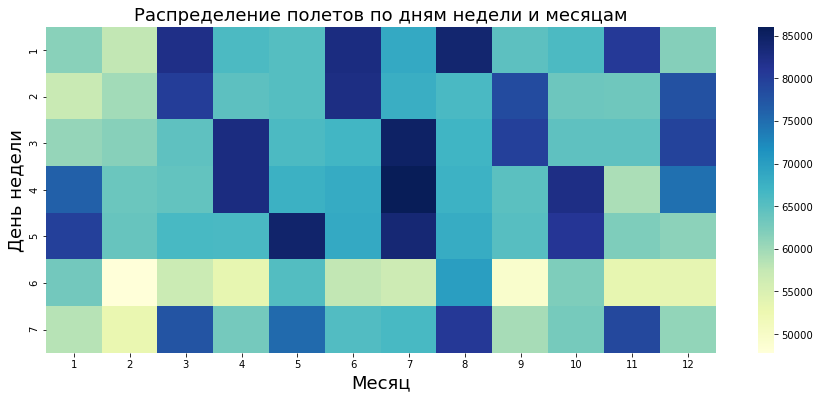

In [30]:
plt.figure(figsize=(15, 6))
sns.heatmap(report_last.T,cmap="YlGnBu")
plt.xlabel("Месяц", fontsize=18)
plt.ylabel("День недели", fontsize=18)
plt.title('Распределение полетов по дням недели и месяцам', fontsize=18)
plt.show()

**Вывод**: По графику  четко видно, что в субботу совершалось минимальное количество полетов, в то время как четверг является самым активным днем по числу перелетов. Причиной тому является большое количество бизнес-перелетов среди недели, в выходные же активность снижается.  Если смотреть на месяца, то  январь и февраль минимальны по данным показатели, в связи с праздниками, а  июль и декабрь максимальны, на них приходится пик летнего и зимнего отдыха. 

### Количество рейсов, средняя задержка вылетов по каждой авиакомпании

In [31]:
#Рассчитаем количество рейсов и среднюю задержку вылета по каждой авиакомпании
count_flights=flights.groupby('airline')['arrival_time'].count().reset_index()
avg_flights=flights.groupby('airline')['departure_delay'].mean().round(2).reset_index()
count_flights

,airline,arrival_time
0,Alaska Airlines Inc.,171692
1,American Airlines Inc.,714855
2,American Eagle Airlines Inc.,279431
3,Atlantic Southeast Airlines,556425
4,Delta Air Lines Inc.,871946
5,Frontier Airlines Inc.,90231
6,Hawaiian Airlines Inc.,76093
7,JetBlue Airways,262687
8,Skywest Airlines Inc.,577943
9,Southwest Airlines Co.,1245053


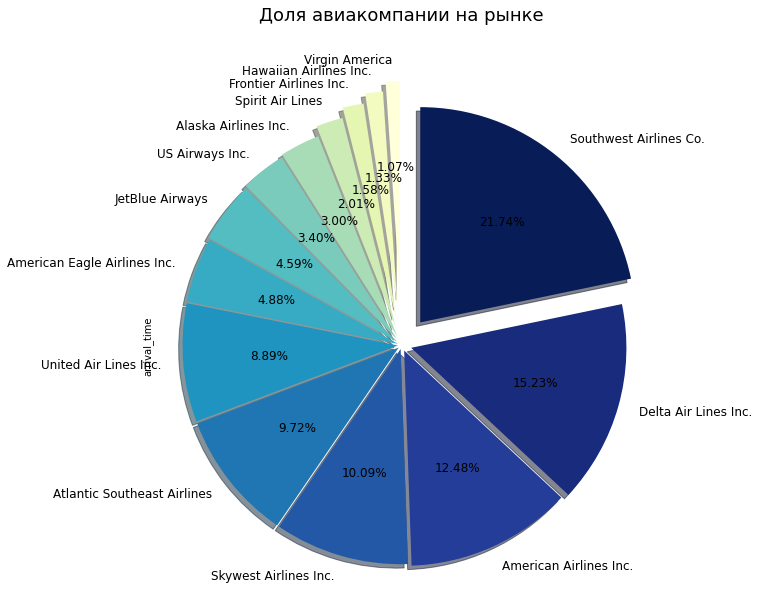

In [32]:
# Построим график доли каждой авикомпании на рынке
share=count_flights.sort_values(by='arrival_time', ascending= True)
labels = share.airline.to_list()
share['arrival_time'].plot.pie(subplots=True,
                                         autopct='%0.2f%%',
                                         fontsize=12,
                                         labels=labels,
                                         figsize=(9,9),
                                         legend=False,
                                         radius = 1.1,
                                         shadow=True,
                                         explode=(0.25,0.2,0.15,0.1,0.05,0.04,
                                                  0.03,0.02,0.02,0.02,
                                                  0.02,0.03,
                                                  0.05,0.15)[:len(share['airline'].unique())],
                                         startangle=90,
                                         colormap='YlGnBu'
                                       )
plt.title('Доля авиакомпании на рынке', fontsize=18, pad=80)    
plt.show()

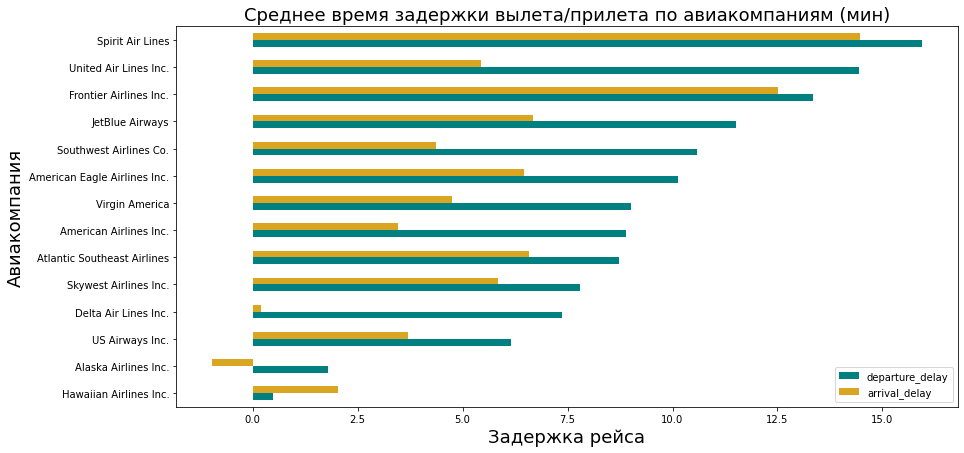

In [33]:
# Покажем на графике среднюю задержку вылета и прилета по каждой авиакомпании
airline_delay = flights.loc[:, ['airline', 'departure_delay','arrival_delay']].groupby('airline').mean().sort_values('departure_delay')
airline_delay.plot.barh(figsize=(14,7), stacked=False, color=['teal','goldenrod'])
plt.ylabel("Авиакомпания", fontsize=18)
plt.xlabel("Задержка рейса", fontsize=18)
plt.title('Среднее время задержки вылета/прилета по авиакомпаниям (мин)', fontsize=18)
plt.show()

**Вывод**: Время задержки вылета и прилета не всегда прямо коррелирует между собой. Особо выделяется Hawaiian Airlines Inc., где задержка вылета минимальна, а прилета достаточно высока и наоборот Delta Air Lines Inc, где задержка вылета по сравнению с задержкой прилета очень разнится. 

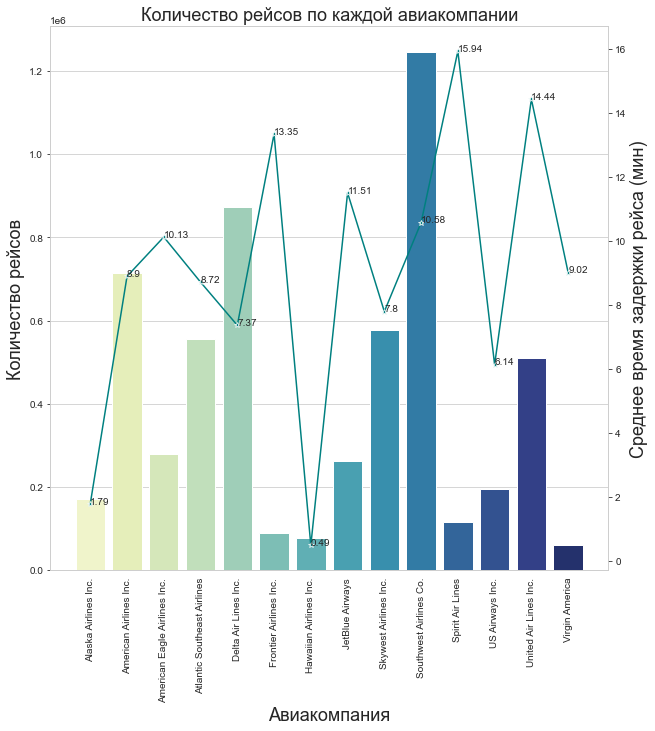

In [34]:
#Построим график по распределению количества рейсов по авиакомпаниям и среднее время задержки рейса
sns.set_style('whitegrid')
fig, ax1 = plt.subplots(figsize=(10,10))
sns.barplot(x="airline", y="arrival_time", data=count_flights,palette='YlGnBu', alpha=1, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 90)
plt.xlabel("Авиакомпания", fontsize=18)
plt.ylabel("Количество рейсов", fontsize=18)
ax2 = ax1.twinx()
sns.lineplot(x="airline", y="departure_delay", data=avg_flights, marker='*', color='teal')
#ax=sns.lineplot(data = avg_flights['departure_delay'], marker='o', sort = False, ax=ax2)
for i, language in enumerate (avg_flights.departure_delay):
    plt.text(avg_flights.airline[i], avg_flights.departure_delay[i], language)
plt.ylabel("Среднее время задержки рейса (мин)", fontsize=18)
plt.grid()
plt.title('Количество рейсов по каждой авиакомпании', fontsize=18)
plt.show()

**Вывод**: на графике показаны 14 авиакомпаний, а также количество предлагаемых ими рейсов и среднее время задержки. Четко видно, что количество рейсов не оказывает существенного влияния на задержки вылета, поскольку такие авиакомпании, как Spirit Air Lines, у которых не так много рейсов, имеют очень большое время задержки вылета. В то же время такие авиакомпании, как Southwest Airlines Co/Delta Air Lines Inc, которые предлагают большое количество рейсов, имеют гораздо меньшее время задержки вылета. Поэтому можно отметить, что Southwest Airlines Co/Delta Air Lines Inc - лучшие авиакомпании в сравнении с Spirit Air Lines.

###  Аэропорт с минимальной задержкой вылета

In [35]:
flights_full.shape

(5332914, 31)

In [36]:
# Оставим только записи c задержками вылета
flights_full_over_zero=flights_full.loc[(flights_full['departure_delay']>=0)]

In [37]:
#Посчитаем по средней задержке аэропорт с минимальной задержкой вылета  (BuGn, YlGnBu, Blues_d)
air_min_delay = flights_full_over_zero.groupby('origin_airport')['departure_delay'].mean().sort_values().head(10).reset_index()
air_min_delay

,origin_airport,departure_delay
0,Westerly State Airport,11.425287
1,King Salmon Airport,12.176471
2,Hilo International Airport,14.558691
3,Dillingham Airport,16.375000
4,Canyonlands Field,17.533333
5,Lewiston-Nez Perce County Airport,17.809524
6,Honolulu International Airport,19.090463
7,Kahului Airport,20.104969
8,Lihue Airport,20.126803
9,Kona International Airport at Keahole,20.164379


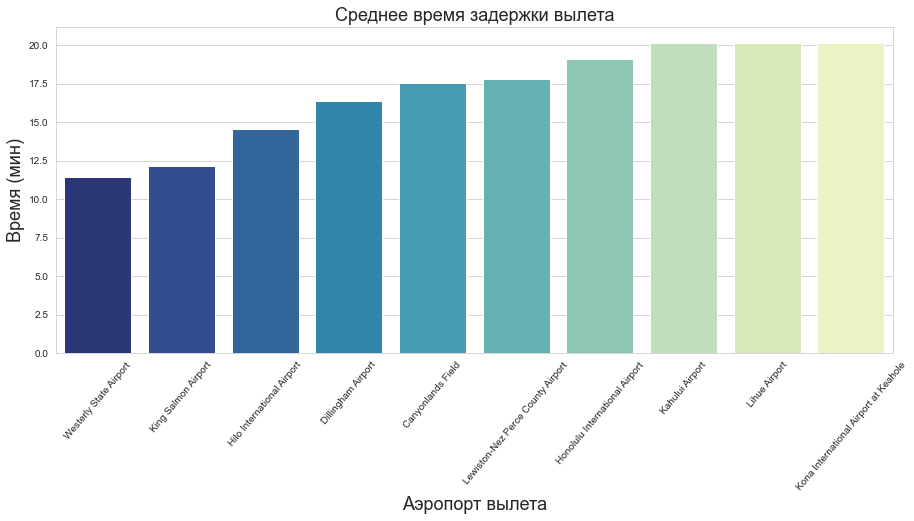

In [38]:
plt.figure(figsize=(15, 6))
ax=sns.barplot(x="origin_airport", y="departure_delay", data=air_min_delay, palette='YlGnBu_r') 
ax.set_xticklabels(ax.get_xticklabels(),rotation = 50)
plt.xlabel("Аэропорт вылета", fontsize=18)
plt.ylabel("Время (мин)", fontsize=18)
plt.title('Среднее время задержки вылета', fontsize=18)
plt.show()

**Вывод:** Westerly State Airport - аэропорт с минимальной задержкой вылета.

### Самая пунктуальная авиакомпания на прилет в Los Angeles International Airport

In [39]:
flights.head(5)

,year,month,day,day_of_week,airline,flight_number,tail_number,origin_airport,destination_airport,scheduled_departure,...,arrival_time,arrival_delay,diverted,cancelled,cancellation_reason,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay
0,2015,1,1,4,Alaska Airlines Inc.,98,N407AS,Ted Stevens Anchorage International Airport,Seattle-Tacoma International Airport,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,American Airlines Inc.,2336,N3KUAA,Los Angeles International Airport,Palm Beach International Airport,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US Airways Inc.,840,N171US,San Francisco International Airport,Charlotte Douglas International Airport,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,American Airlines Inc.,258,N3HYAA,Los Angeles International Airport,Miami International Airport,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,Alaska Airlines Inc.,135,N527AS,Seattle-Tacoma International Airport,Ted Stevens Anchorage International Airport,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
flights_to_losang=flights.loc[(flights['destination_airport']== 'Los Angeles International Airport')]

In [41]:
flights_to_losang.head()

,year,month,day,day_of_week,airline,flight_number,tail_number,origin_airport,destination_airport,scheduled_departure,...,arrival_time,arrival_delay,diverted,cancelled,cancellation_reason,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay
101,2015,1,1,4,Skywest Airlines Inc.,6512,N925SW,Fresno Yosemite International Airport,Los Angeles International Airport,535,...,650.0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
103,2015,1,1,4,Skywest Airlines Inc.,4986,N719SK,Austin-Bergstrom International Airport,Los Angeles International Airport,538,...,654.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
129,2015,1,1,4,Skywest Airlines Inc.,2599,N435SW,Denver International Airport,Los Angeles International Airport,545,...,811.0,56.0,0,0,NaN,0.0,0.0,56.0,0.0,0.0
131,2015,1,1,4,Skywest Airlines Inc.,6457,N560SW,Santa Maria Public Airport (Capt G. Allan Hanc...,Los Angeles International Airport,545,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
156,2015,1,1,4,United Air Lines Inc.,1222,N68452,Orlando International Airport,Los Angeles International Airport,555,...,840.0,4.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
flights_to_losang1=flights_to_losang.loc[(flights_to_losang['arrival_delay']>0)]
flights_to_losang2=flights_to_losang.loc[(flights_to_losang['arrival_delay']<=0)]

In [43]:
arrival_min_delay1 = flights_to_losang1.groupby('airline')['arrival_delay'].mean().sort_values().reset_index()
arrival_min_delay1

,airline,arrival_delay
0,Hawaiian Airlines Inc.,21.638202
1,Alaska Airlines Inc.,22.913029
2,US Airways Inc.,27.733333
3,Virgin America,27.969931
4,Southwest Airlines Co.,28.729095
5,Delta Air Lines Inc.,31.271977
6,Skywest Airlines Inc.,31.593320
7,JetBlue Airways,32.840000
8,Frontier Airlines Inc.,33.198592
9,United Air Lines Inc.,36.184633


In [44]:
arrival_min_delay2 = flights_to_losang2.groupby('airline')['arrival_delay'].mean().sort_values().reset_index()
arrival_min_delay2

,airline,arrival_delay
0,JetBlue Airways,-18.610354
1,American Airlines Inc.,-16.784155
2,American Eagle Airlines Inc.,-15.738636
3,Hawaiian Airlines Inc.,-15.272645
4,US Airways Inc.,-15.033633
5,Delta Air Lines Inc.,-14.429349
6,United Air Lines Inc.,-14.105716
7,Virgin America,-12.691035
8,Alaska Airlines Inc.,-12.108392
9,Spirit Air Lines,-11.739733


In [45]:
arrival_min_delay = flights_to_losang.groupby('airline')['arrival_delay'].mean().sort_values().reset_index()
arrival_min_delay

,airline,arrival_delay
0,Hawaiian Airlines Inc.,-4.668819
1,JetBlue Airways,0.155539
2,Alaska Airlines Inc.,0.536180
3,Delta Air Lines Inc.,2.135468
4,American Airlines Inc.,2.691133
5,US Airways Inc.,3.039387
6,Virgin America,4.424613
7,United Air Lines Inc.,8.551574
8,Skywest Airlines Inc.,8.645215
9,Southwest Airlines Co.,9.008806


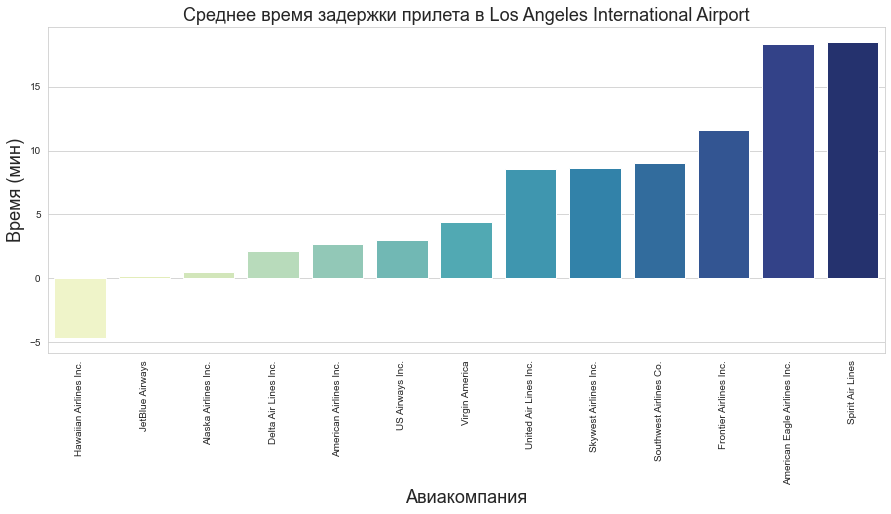

In [46]:
plt.figure(figsize=(15, 6))
ax=sns.barplot(x="airline", y="arrival_delay", data=arrival_min_delay, palette='YlGnBu') 
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.xlabel("Авиакомпания", fontsize=18)
plt.ylabel("Время (мин)", fontsize=18)
plt.title('Среднее время задержки прилета в Los Angeles International Airport', fontsize=18)
plt.show()

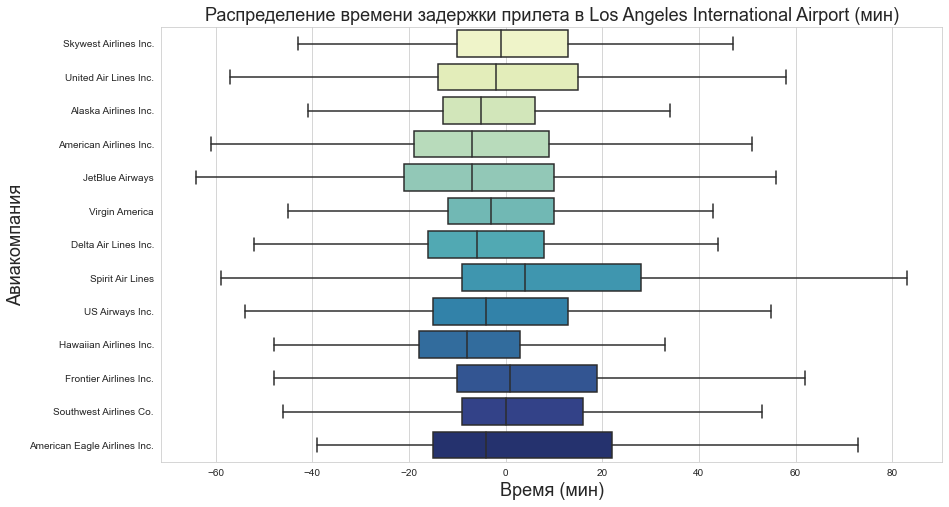

In [47]:
plt.figure(figsize=(14, 8))
fig = sns.boxplot(y="airline", x="arrival_delay", data=flights_to_losang,palette="YlGnBu", showfliers=False)
plt.ylabel("Авиакомпания", fontsize=18)
plt.xlabel("Время (мин)", fontsize=18)
plt.title('Распределение времени задержки прилета в Los Angeles International Airport (мин)', fontsize=18)
plt.show(fig)

**Вывод**: Самой пунктуальной авиакомпанией с учетом среднего времени задержек и раннего прилета является JetBlue Airways, если учитывать пунктуальность только с точки зрения опоздания, то самой пунктуальной является Hawaiian Airlines Inc., если же учитывать пунктуальность только с точки зрения раннего прилета, то самой пунктуальной является Skywest Airlines Inc.
На графике выше также видно, что у Alaska Airlines Inc. минимальный разброс значений по задержке прилета, что говорит о  стабильности ее работы. JetBlue Airways имеет минимальное среднее значение только за счет широкого диапазона значений. 

### Аэропорт, где самолёты проводят больше всего времени на рулении (среднее значение)

In [48]:
flights.head()

,year,month,day,day_of_week,airline,flight_number,tail_number,origin_airport,destination_airport,scheduled_departure,...,arrival_time,arrival_delay,diverted,cancelled,cancellation_reason,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay
0,2015,1,1,4,Alaska Airlines Inc.,98,N407AS,Ted Stevens Anchorage International Airport,Seattle-Tacoma International Airport,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,American Airlines Inc.,2336,N3KUAA,Los Angeles International Airport,Palm Beach International Airport,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US Airways Inc.,840,N171US,San Francisco International Airport,Charlotte Douglas International Airport,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,American Airlines Inc.,258,N3HYAA,Los Angeles International Airport,Miami International Airport,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,Alaska Airlines Inc.,135,N527AS,Seattle-Tacoma International Airport,Ted Stevens Anchorage International Airport,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
airport_max_taxi=flights_full.groupby('origin_airport')['taxi_out', 'taxi_in','departure_delay'].mean().reset_index().sort_values(by='taxi_out',ascending=False)
airport_max_taxi

<ipython-input-49-8121dc349395>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  airport_max_taxi=flights_full.groupby('origin_airport')['taxi_out', 'taxi_in','departure_delay'].mean().reset_index().sort_values(by='taxi_out',ascending=False)


,origin_airport,taxi_out,taxi_in,departure_delay
145,John F. Kennedy International Airport (New Yor...,27.009783,7.191489,12.128115
159,LaGuardia Airport (Marine Air Terminal),26.721370,7.818918,13.231398
138,Ithaca Tompkins Regional Airport,22.533333,7.733333,14.633333
226,Philadelphia International Airport,21.709366,7.960159,10.450112
272,Sloulin Field International Airport,20.996419,7.888933,4.279745
...,...,...,...,...
299,Valdez Airport,7.100000,3.585000,-3.740000
70,Deadhorse Airport (Prudhoe Bay Airport),7.097969,4.405372,0.154122
309,Wiley Post-Will Rogers Memorial Airport,6.798309,3.667883,1.646135
156,Kodiak Airport,6.574371,3.798627,0.405034


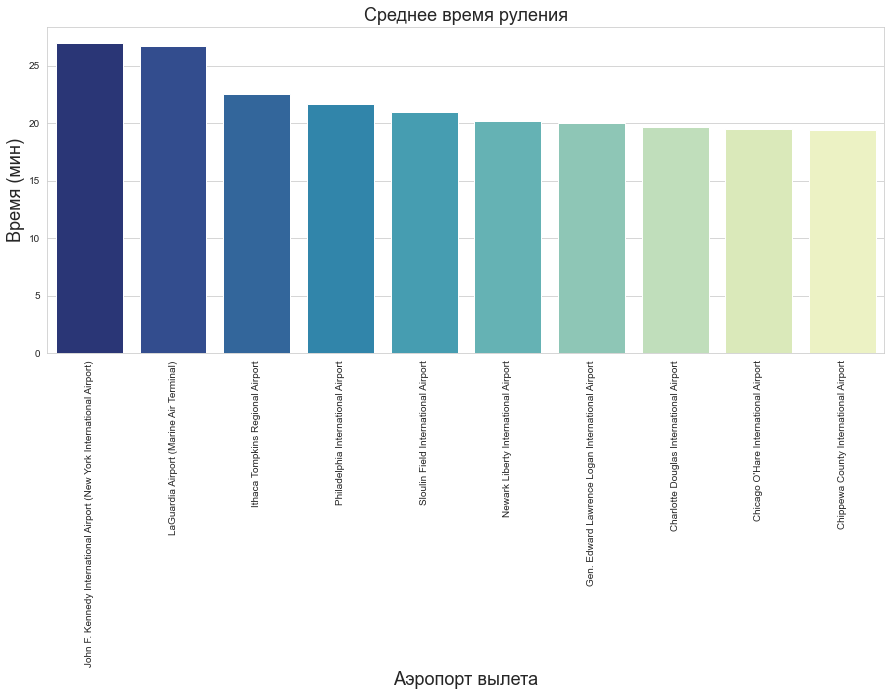

In [50]:
plt.figure(figsize=(15, 6))
ax=sns.barplot(x="origin_airport", y="taxi_out", data=airport_max_taxi.head(10), palette='YlGnBu_r') 
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.xlabel("Аэропорт вылета", fontsize=18)
plt.ylabel("Время (мин)", fontsize=18)
plt.title('Среднее время руления', fontsize=18)
plt.show()

**Вывод**: John F. Kennedy International Airport (New York) является аэропортом с максимальным среднем временем руления перед взлетом.

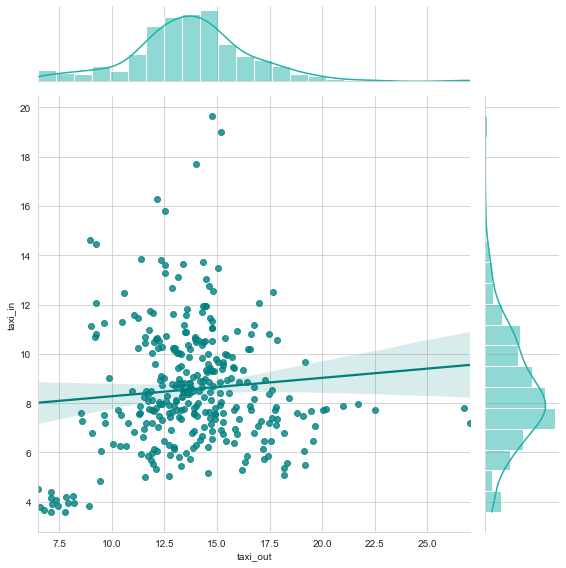

In [51]:
#Построим графики зависимости задержки вылета от времени руления,)
sns.jointplot(data=airport_max_taxi, x="taxi_out", y="taxi_in", color= 'teal',kind="reg", height=8, marginal_kws={'color': 'lightseagreen'})
plt.xlabel("Время руления - вылет (мин)", fontsize=18)
plt.ylabel("Время руления - прилет (мин)", fontsize=18)
plt.show()

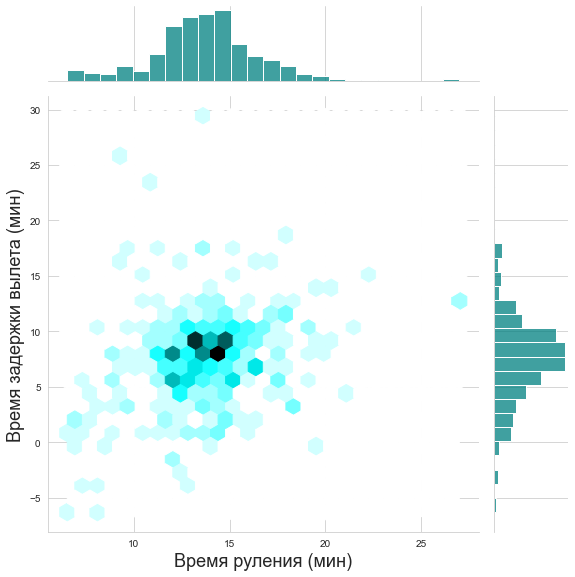

In [52]:
sns.jointplot(data=airport_max_taxi, x="taxi_out", y="departure_delay", color= 'teal', kind="hex", height=8, marginal_kws={'color': 'teal'})
plt.xlabel("Время руления (мин)", fontsize=18)
plt.ylabel("Время задержки вылета (мин)", fontsize=18)
plt.show()

**Вывод**: не наблюдается прямой линейной зависимости времени руления и времени задержки вылета, значения сконцентрированы в диапазонах:  время руления – от 12 до 16 минут, время задержки от 4 до 12 минут.


### Модель, которая будет выбирать топ 3 аэропорта прилета (вероятность опоздания минимальная – RMSE метрика),  в зависимости от аэропорта вылета  


In [53]:
def make_date(df):
  return datetime.date(df.year, df.month, df.day)

def make_features(data, max_lag, rolling_mean_size):
    data['year'] = data.dDate.dt.year
    data['month'] = data.dDate.dt.month
    data['day'] = data.dDate.dt.day
    data['dayofweek'] = data.dDate.dt.dayofweek
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['arrival_delay'].shift(lag)
        
flights_full['dDate'] = flights_full.apply(make_date,axis = 1)

<ipython-input-53-137204ab9c74>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights_full['dDate'] = flights_full.apply(make_date,axis = 1)


In [54]:
flights_full.shape

(5332914, 32)

In [55]:
flights_full_grouped = flights_full.groupby(['dDate','destination_airport'])['arrival_delay'].sum().reset_index()
flights_full_grouped['dDate'] = pd.to_datetime(flights_full_grouped['dDate'])

In [56]:
flights_full_grouped

,dDate,destination_airport,arrival_delay
0,2015-01-01,Aberdeen Regional Airport,-19.0
1,2015-01-01,Abilene Regional Airport,0.0
2,2015-01-01,Abraham Lincoln Capital Airport,150.0
3,2015-01-01,Adak Airport,-27.0
4,2015-01-01,Akron-Canton Regional Airport,-101.0
...,...,...,...
101897,2015-12-31,Yakutat Airport,-23.0
101898,2015-12-31,Yampa Valley Airport (Yampa Valley Regional),-66.0
101899,2015-12-31,Yeager Airport,-29.0
101900,2015-12-31,Yellowstone Regional Airport,-15.0


In [57]:
where_to_go = []
for dest in flights_full_grouped.destination_airport.unique():
    tempo = flights_full_grouped[flights_full_grouped.destination_airport==dest][['dDate','arrival_delay']]
    tempo.columns = ['dDate','arrival_delay']
    tempo = pd.DataFrame(tempo)
    
    try:
    
        make_features(tempo,21,7)
        tempo.dropna(inplace=True)
        tempo.set_index('dDate',inplace=True)
           
        X_train,X_test,y_train, y_test = train_test_split(tempo.drop('arrival_delay', axis=1),tempo.arrival_delay, shuffle=False, test_size=0.20)

        model_lr = LinearRegression()
        model_lr.fit(X_train,y_train)

        y_predicted_lr = model_lr.predict(X_test)
        where_to_go.append([dest,y_test.mean(),np.sqrt(mean_squared_error(y_test, y_predicted_lr))])

    except Exception as e:
        print('Error', str(e))

In [58]:
where_to_go = pd.DataFrame(where_to_go)
where_to_go.columns = ['destination_airport','mean_arrival_delay_in_past','RMSE']

In [117]:
start_airport = np.random.choice(flights_full['origin_airport'].unique()) 
where_to_go_from_start_airport = flights_full[flights_full.origin_airport==start_airport]['destination_airport'].unique()

where_to_go_from_start_airport = pd.DataFrame(where_to_go_from_start_airport)
where_to_go_from_start_airport.columns = ['destination_airport']

top3 = where_to_go_from_start_airport\
    .merge(where_to_go,on='destination_airport',how='inner')\
    .sort_values(by=['RMSE','mean_arrival_delay_in_past'],ascending=[True, True])\
    .head(3)

print('Лучшие направления с аэропорта',start_airport)
print('')
print(top3)


Лучшие направления с аэропорта General Wayne A. Downing Peoria International Airport

                            destination_airport  mean_arrival_delay_in_past  \
0                  Detroit Metropolitan Airport                  -11.142857   
6  Minneapolis-Saint Paul International Airport                  642.809524   
5          George Bush Intercontinental Airport                 1463.888889   

          RMSE  
0  2339.192769  
6  2923.240827  
5  5199.863193  


In [118]:
x = [start_airport]
df_start_airoport = pd.DataFrame(x, columns=['AIRPORT'])
df_start_airoport_full=pd.merge(df_start_airoport, airports) 
df_start_airoport_full

,AIRPORT,IATA_CODE,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,General Wayne A. Downing Peoria International ...,PIA,Peoria,IL,USA,40.66424,-89.69331


In [119]:
df_dist_airoport_full=pd.merge(top3, airports, left_on='destination_airport', right_on='AIRPORT' ) 
df_dist_airoport_full

,destination_airport,mean_arrival_delay_in_past,RMSE,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,Detroit Metropolitan Airport,-11.142857,2339.192769,DTW,Detroit Metropolitan Airport,Detroit,MI,USA,42.21206,-83.34884
1,Minneapolis-Saint Paul International Airport,642.809524,2923.240827,MSP,Minneapolis-Saint Paul International Airport,Minneapolis,MN,USA,44.88055,-93.21692
2,George Bush Intercontinental Airport,1463.888889,5199.863193,IAH,George Bush Intercontinental Airport,Houston,TX,USA,29.98047,-95.33972


In [136]:
#Отрисуем карту с аэропортом вылета и топ 3 аэропорта прилета
lat_dist = df_dist_airoport_full['LATITUDE']
lon_dist = df_dist_airoport_full['LONGITUDE']
elevation_dist = df_dist_airoport_full['destination_airport']

lat_start = df_start_airoport_full['LATITUDE']
lon_start = df_start_airoport_full['LONGITUDE']
elevation_start = df_start_airoport_full['AIRPORT']

map = folium.Map(location = [40, -95], zoom_start = 5)
for lat, lon, elevation in zip(lat_dist, lon_dist, elevation_dist):
    folium.Marker(location=[lat, lon], popup=str(elevation), icon=folium.Icon(color = "darkgreen")).add_to(map)
for lat, lon, elevation in zip(lat_start, lon_start, elevation_start):
    folium.Marker(location=[lat, lon], popup=str(elevation), icon=folium.Icon(color = "red")).add_to(map)

map